[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marmalux/Clientes_TelecomX/blob/main/Clientes_TelecomX.ipynb)


# Análisis de evasión de clientes en Telecom X

## Importación de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

#importar de una API y pasar a json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos_api = requests.get(url)
datos_json=json.loads(datos_api.text)

In [ ]:
# normalizar datos
datos_cliente = pd.json_normalize(datos_json)
datos_cliente.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5083,6950-TWMYB,No,Male,0,Yes,Yes,54,Yes,No,Fiber optic,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),79.95,4362.05
965,1355-KUSBG,No,Female,0,Yes,Yes,7,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,48.80,349.8
6726,9259-PACGQ,Yes,Female,0,Yes,No,34,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,62.65,2274.9
1733,2465-BLLEU,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.75,19.75
6563,9027-YFHQJ,No,Male,0,No,No,7,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.05,152.95


### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## Transformación de datos

Valores unicos

In [ ]:
for columna in datos_cliente:
  if datos_cliente[columna].nunique() <50:
    print(f'Valores unicos de la columna {columna} \n{datos_cliente[columna].unique()}')
    print(f'-'*50)


Valores unicos de la columna Churn 
['No' 'Yes' '']
--------------------------------------------------
Valores unicos de la columna customer.gender 
['Female' 'Male']
--------------------------------------------------
Valores unicos de la columna customer.SeniorCitizen 
[0 1]
--------------------------------------------------
Valores unicos de la columna customer.Partner 
['Yes' 'No']
--------------------------------------------------
Valores unicos de la columna customer.Dependents 
['Yes' 'No']
--------------------------------------------------
Valores unicos de la columna phone.PhoneService 
['Yes' 'No']
--------------------------------------------------
Valores unicos de la columna phone.MultipleLines 
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos de la columna internet.InternetService 
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Valores unicos de la columna internet.OnlineSecurity 
['No' 'Yes' 'N

Datos duplicados

In [ ]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
print("Numero de duplicados", datos_cliente.duplicated().sum())

Numero de duplicados 0


Valores nulos

In [ ]:
print("Numero de nulos", datos_cliente.isnull().sum())

Numero de nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Buscar datos vacios no nulos

In [ ]:
print(datos_cliente.apply(lambda x: x.astype(str).str.strip()=='').sum())

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


Después de revisar, la columna *Churn* y la columna *account.Charges.Total* tienen valores inconsistentes, *Churn* faltan  valores de 'Yes' pues depués de analizar, hay gastos totales por lo que debe ser aun cliente de la empresa, y la columna de gastos totales *account.Charges.Total* tiene valores vacios no nulos, pero como son clientes que ya no estan en la empresa se puden dejar como 0 para poder cambiar el tipo de dato.

Se pueden eliminar estos datos, pero depende de el comportamiento de las otras columnas si es que son importantes, como no se puede revisar registro por registro, para la columna de gsatos totales, se puede revisar un poco y se determina que podemos dejar estos valores como 0

In [ ]:
# transformar columna Churn
datos_cliente = datos_cliente[datos_cliente['Churn'].str.strip()!=''] # se remplazan las celdas vacias a valores nulos y despues se eliminan

#transformar columna 	account.Charges.Total
datos_cliente['account.Charges.Total'] = datos_cliente['account.Charges.Total'].replace(' ',pd.NA).fillna(0)

Pasar la columna de gastos totales a tipo de dato float

In [ ]:
#Pasar a tipo float los datos de los cargos totales
datos_cliente['account.Charges.Total']=datos_cliente['account.Charges.Total'].astype(np.float64)

In [ ]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

### Formatear nombres de columnas para mejor entendimiento en presentación

In [ ]:
columnas=['customerID',
          'Still_Customer',
          'Gender',
          'Senior_Citizen',
          'Partner',
          'Dependents',
          'Contract_Months',
          'Phone_Service',
          'Multiple_Lines',
          'Internet_Service',
          'Online_Security',
          'Online_Backup',
          'Device_Protection',
          'Tech_Support',
          'Streaming_TV',
          'Streaming_Movies',
          'Contract_type',
          'Paperless_Billing',
          'Payment_Method',
          'Charges_Monthly',
          'Charges_Total']
datos_cliente.columns = columnas

Crear columa de cargos al día "Charges_Daily" y una columna de cantidad de servicios contratados

In [ ]:
#
gastos_diarios=datos_cliente['Charges_Monthly'].to_numpy()
gastos_diarios = gastos_diarios/30
datos_cliente['Charges_Day'] = np.round(gastos_diarios,2)

Crear columna de cantidad de servicios usados

In [ ]:
datos_cliente['Services_Number']= (datos_cliente.loc[:,'Online_Security':'Streaming_Movies']== 'Yes').sum(axis=1)
datos_cliente.sample(4)

,customerID,Still_Customer,Gender,Senior_Citizen,Partner,Dependents,Contract_Months,Phone_Service,Multiple_Lines,Internet_Service,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract_type,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total,Charges_Day,Services_Number
1714,2434-EEVDB,No,Female,0,Yes,No,64,Yes,Yes,Fiber optic,...,No,Yes,No,Two year,Yes,Credit card (automatic),94.60,5948.70,3.15,3
5904,8065-QBYTO,No,Female,1,No,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,No,One year,Yes,Credit card (automatic),99.65,7181.25,3.32,4
6586,9058-CBREO,Yes,Female,1,No,No,1,Yes,Yes,DSL,...,No,No,No,Month-to-month,No,Mailed check,50.55,50.55,1.68,0
1995,2824-DXNKN,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,No,Two year,Yes,Bank transfer (automatic),71.45,5025.85,2.38,3


Hay columnas en las cuales solo existen los valores unicos de "Yes" y "No" , por lo que se pueden cambiar valores a 0 y 1 para poder hacer operaciones mas sencillas, hay otros que tienen mas valores unicos que no se pueden cambiar tan facilmente, así que el análisis será distinto

Las siguientes columans son las que pueden cambiar a eso
 * 'Still_Customer'
 * 'Partner'
 * 'Dependents'
 * 'Phone_Service'
 * 'Paperless_Billing'
 * 'Mutiple_Lines'

In [ ]:
datos_cliente[['Still_Customer',
                'Partner',
                'Dependents',
                'Phone_Service',
                'Paperless_Billing']]=datos_cliente[['Still_Customer',
                                      'Partner',
                                      'Dependents',
                                      'Phone_Service',
                                      'Paperless_Billing']].replace('No',0).replace('Yes',1);
# cambiar el tipo de dato de estas columnas para poder trabajar con ellas como enteros
datos_cliente[['Still_Customer',
                'Partner',
                'Dependents',
                'Phone_Service',
                'Paperless_Billing']]\
                =datos_cliente[['Still_Customer',
                                'Partner',
                                'Dependents',
                                'Phone_Service',
                                'Paperless_Billing']].astype(int);

/tmp/ipython-input-1537892233.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Paperless_Billing']].replace('No',0).replace('Yes',1);


In [ ]:
print("Numero de nulos", datos_cliente.isnull().sum())

Numero de nulos customerID           0
Still_Customer       0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Contract_Months      0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract_type        0
Paperless_Billing    0
Payment_Method       0
Charges_Monthly      0
Charges_Total        0
Charges_Day          0
Services_Number      0
dtype: int64


In [ ]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   Still_Customer     7043 non-null   int64  
 2   Gender             7043 non-null   object 
 3   Senior_Citizen     7043 non-null   int64  
 4   Partner            7043 non-null   int64  
 5   Dependents         7043 non-null   int64  
 6   Contract_Months    7043 non-null   int64  
 7   Phone_Service      7043 non-null   int64  
 8   Multiple_Lines     7043 non-null   object 
 9   Internet_Service   7043 non-null   object 
 10  Online_Security    7043 non-null   object 
 11  Online_Backup      7043 non-null   object 
 12  Device_Protection  7043 non-null   object 
 13  Tech_Support       7043 non-null   object 
 14  Streaming_TV       7043 non-null   object 
 15  Streaming_Movies   7043 non-null   object 
 16  Contract_type      7043 non-n

## Análisis descriptivo de valores

In [ ]:
estadisticas_columnas=datos_cliente.describe() # se almacena el dataframe en una variable para poder usar estos datos despues
datos_cliente.describe()

,Still_Customer,Senior_Citizen,Partner,Dependents,Contract_Months,Phone_Service,Paperless_Billing,Charges_Monthly,Charges_Total,Charges_Day,Services_Number
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675,2.037910
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088,1.847682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,6.000000


Como son la cantidad de clientes que ya no estan los que necesitamos para responder, se observa como es la distrubucion de esta

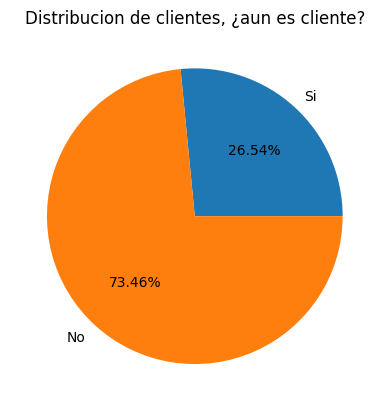

In [ ]:
fig, ax=plt.subplots()
distribucion_cliente =estadisticas_columnas.loc['mean','Still_Customer']
ax.pie(x=[distribucion_cliente,1-distribucion_cliente],labels=['Si','No'],autopct='%0.2f%%')
ax.set_title('Distribucion de clientes, ¿aun es cliente?')
plt.show()
fig.savefig('distribucion_clientes.png')

Para los columnas donde hay mas que "Yes" y "No" como 'Gender' o 'Internet_Service

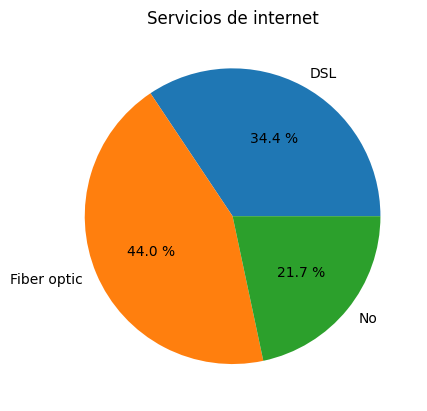

In [ ]:
servicios_internet = datos_cliente['Internet_Service'].unique()

cantidad_servicios_internet= [(datos_cliente['Internet_Service']==i).sum() for i in servicios_internet]
plt.pie(cantidad_servicios_internet,labels = servicios_internet, autopct="%0.1f %%")
plt.title('Servicios de internet')
plt.show()

### Recuento por variables categoricas

Recuento por variables categoricas como género, acompañante, si es mayor a 65, etc para saber si hay algo que determine o oriente al resultado de la baja de clientes

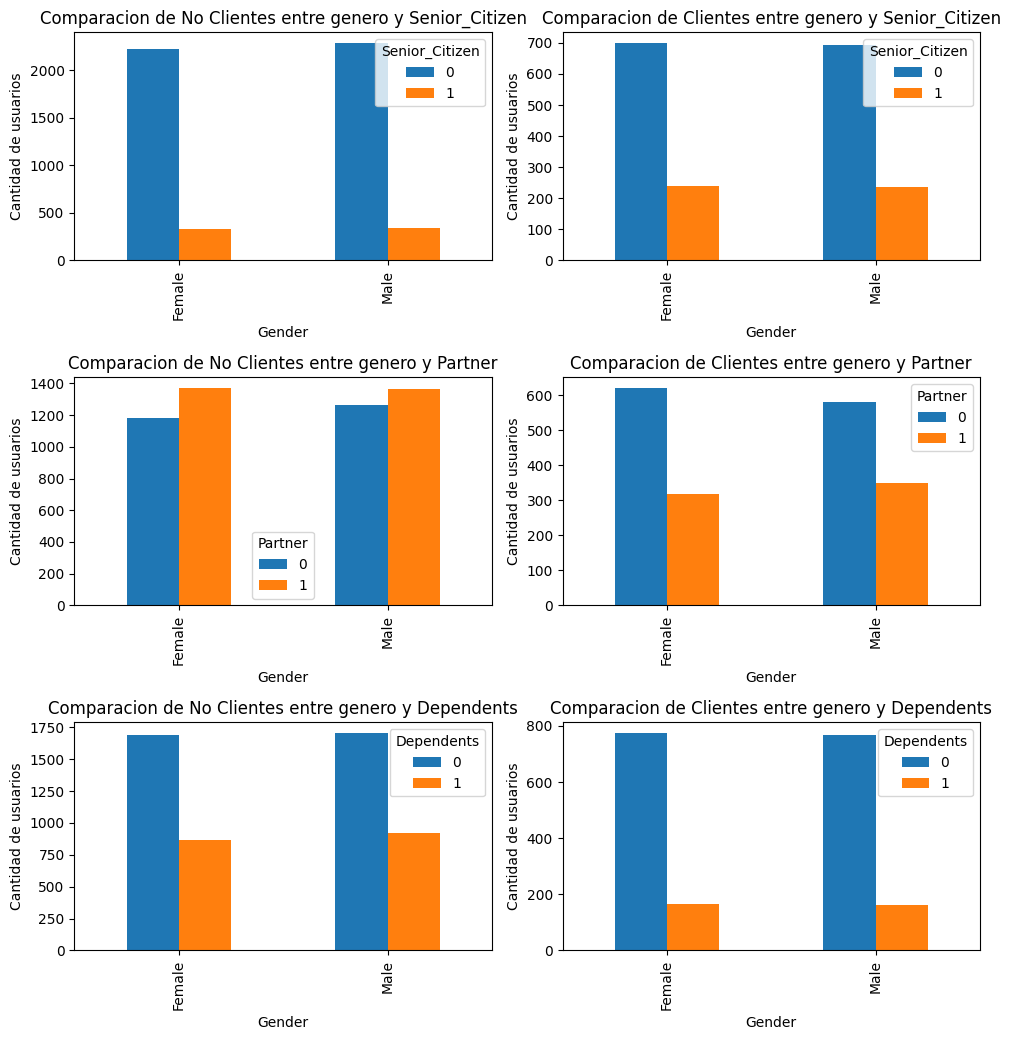

In [ ]:
# Categorias que pueden ser cercanas a lo relacionado con asuntos de las personas como el genero, acompañantes o si es una persona mayor

categorias_genero=['Senior_Citizen', 'Partner','Dependents']
fig,axs=plt.subplots(nrows=len(categorias_genero),ncols=2,figsize=(10,3.5*len(categorias_genero)))

#se crean las graficas observando el comportamiento de los que son y no son clientes para estas categorias divididas por genero
for cliente in datos_cliente['Still_Customer'].unique():
  for categorico in categorias_genero:
    # Se crea una tabla dinamica para cada categoria y despues su grafica de barras
    tabla= pd.pivot_table(data = datos_cliente[datos_cliente['Still_Customer']==cliente],index='Gender',columns=categorico,aggfunc='size')

    #la grafica se coloca en el espacio asignado para la comparacion segun el subplot
    tabla.plot(kind='bar',stacked=False,title=f'Comparacion de {'No Clientes' if cliente==0 else 'Clientes'} entre genero y {categorico}'\
               ,ax=axs[categorias_genero.index(categorico),cliente]);


for ax in axs.flat:
  ax.set_ylabel('Cantidad de usuarios') # se coloca el titulo del eje Y
plt.tight_layout()# la grafica se estiliza a la ventana
fig.savefig('categorias_personas.png',dpi=150, bbox_inches="tight")
plt.show()

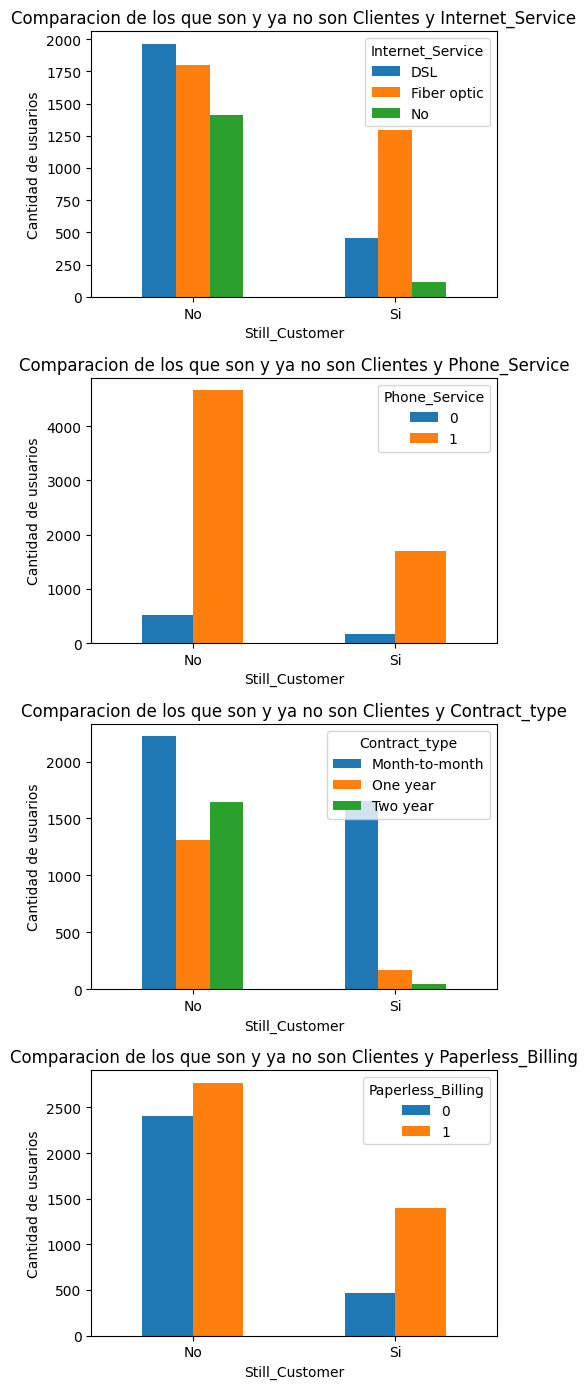

In [ ]:
# categorias aparte que dependen mas del servicio
categorias_varias=['Internet_Service','Phone_Service','Contract_type', 'Paperless_Billing']

fig,axs=plt.subplots(nrows=len(categorias_varias),figsize=(5,3.5*len(categorias_varias)))

for categorico in categorias_varias:
  tabla= pd.pivot_table(data =  datos_cliente,index='Still_Customer',columns=categorico,aggfunc='size')

  tabla.plot(kind='bar',stacked=False,title=f'Comparacion de los que son y ya no son Clientes y {categorico}'\
              ,ax=axs[categorias_varias.index(categorico)]); # se colocan las posiciones de la grafica en un lugar del subplot

  axs[categorias_varias.index(categorico)].set_xticklabels(['No','Si']) # se formatea las etiquetas del eje x para que sea mejor visualmente

for ax in axs.flat:
  ax.tick_params(axis='x', rotation=0) # se cambia la direccion de las equiquetas del eje x a 0 para mejor visualizacion
  ax.set_ylabel('Cantidad de usuarios')

plt.tight_layout()# la grafica se estiliza a la ventana

plt.savefig('comparacion_demas_categorias.png', dpi=150, bbox_inches="tight")
plt.show()

### Conteo de evasión de clientes por variables numéricas

Se hace una comparativa de los gastos de los usuarios que son y no son clientes para examinar si existe una tendencia, para ello se usa el metodo de pago como referencia

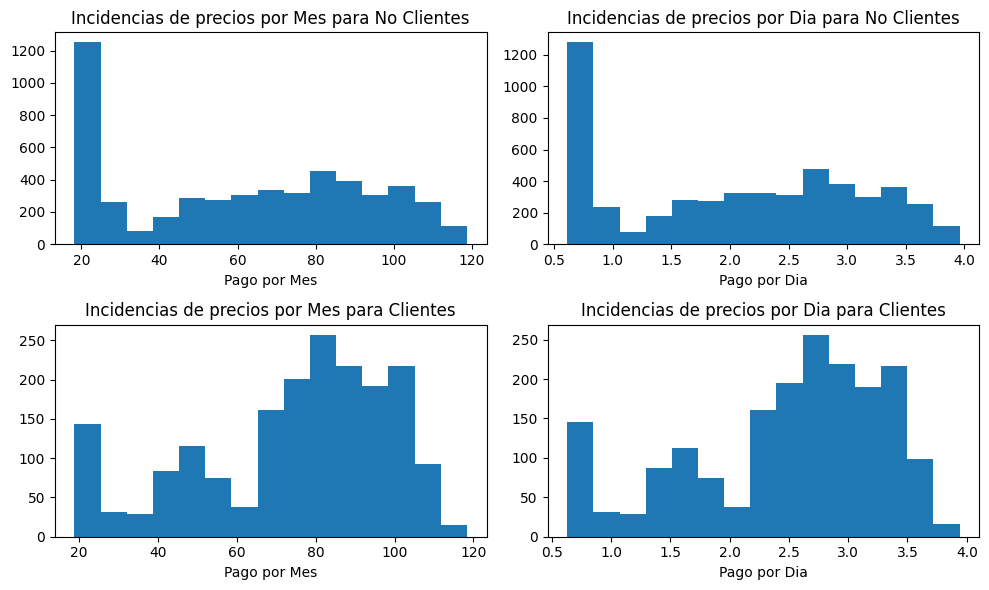

In [ ]:

cargos = ['Charges_Monthly','Charges_Day']
fig,axs=plt.subplots(2,2,figsize=(10,6))
for cliente in datos_cliente['Still_Customer'].unique():
  for i,cargo in enumerate(cargos):
    axs[cliente,i].hist(datos_cliente[datos_cliente['Still_Customer']==cliente][cargo],bins=15)
    axs[cliente,i].set_title(f'Incidencias de precios por {'Mes' if i==0 else 'Dia'} para {'No Clientes' if cliente==0 else 'Clientes'}')
    axs[cliente,i].set_xlabel(f'Pago por {'Mes' if i==0 else 'Dia'}')

plt.tight_layout()# la grafica se estiliza a la ventana
plt.show()

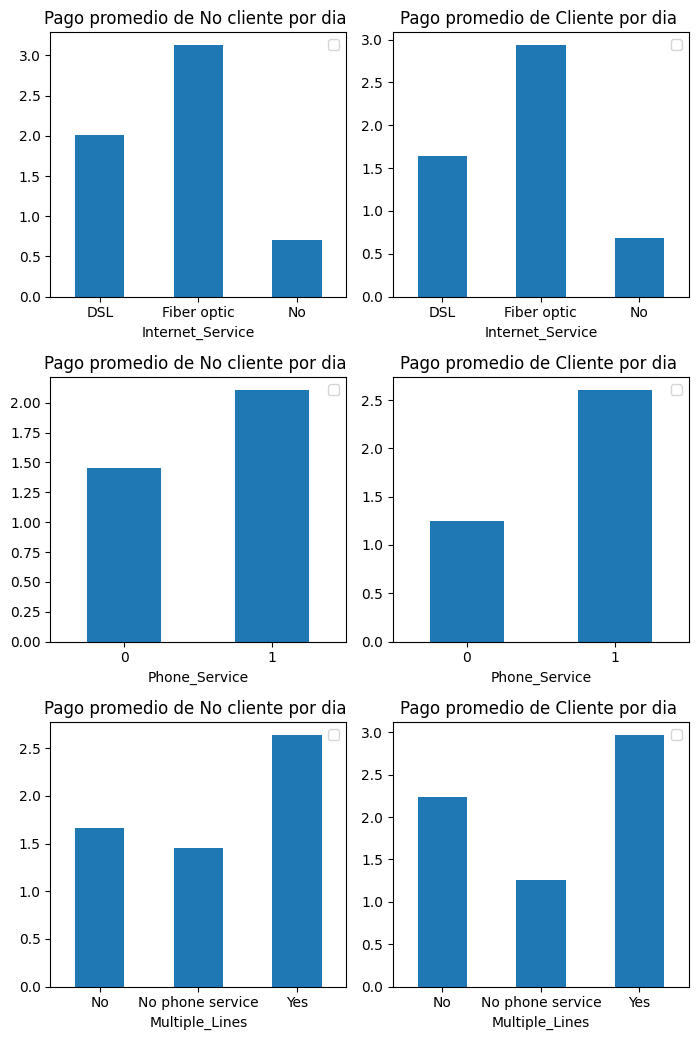

In [ ]:
categorias_numericas=['Internet_Service','Phone_Service','Multiple_Lines']
fig, axs=plt.subplots(nrows=len(categorias_numericas),ncols=2,figsize=(7,len(categorias_numericas)*3.5))
for cliente in datos_cliente['Still_Customer'].unique():
  for i,categoria in enumerate(categorias_numericas):
    tabla = pd.pivot_table(data=datos_cliente[datos_cliente['Still_Customer']==cliente],index=categoria,values='Charges_Day',aggfunc='mean')
    tabla.plot(kind='bar',title=f'Pago promedio de {'No cliente' if cliente==0 else 'Cliente'} por dia ',\
               ax=axs[i,cliente],rot=0)

for ax in axs.flat:
  ax.legend('')
plt.tight_layout()
plt
plt.show()

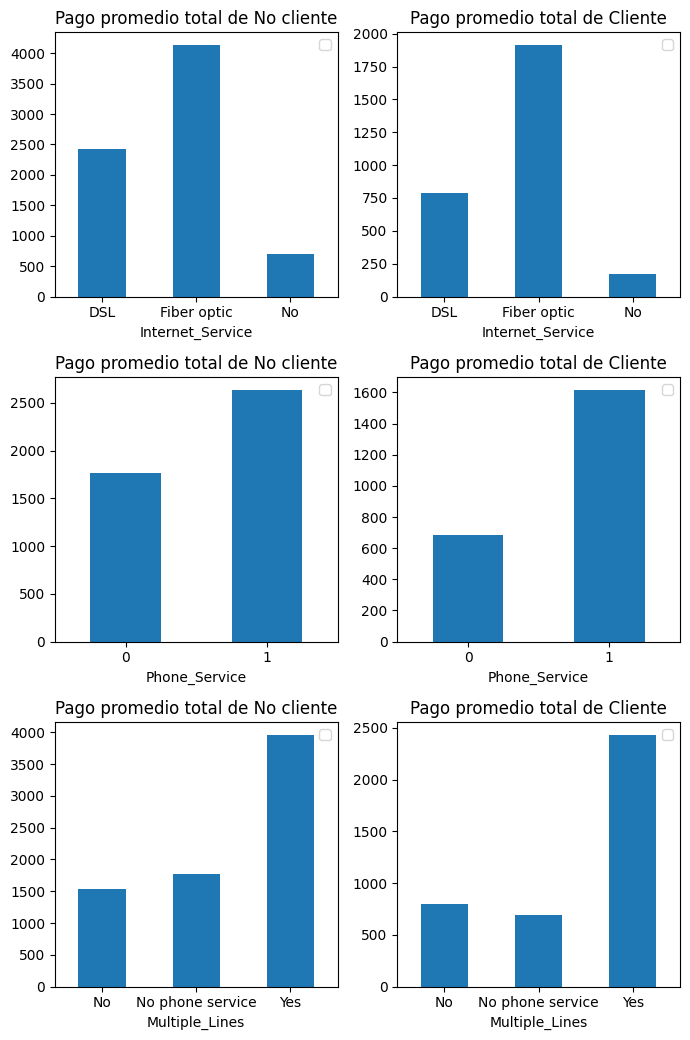

In [ ]:
categorias_numericas=['Internet_Service','Phone_Service','Multiple_Lines']
fig, axs=plt.subplots(nrows=len(categorias_numericas),ncols=2,figsize=(7,len(categorias_numericas)*3.5))
for cliente in datos_cliente['Still_Customer'].unique():
  for i,categoria in enumerate(categorias_numericas):
    tabla = pd.pivot_table(data=datos_cliente[datos_cliente['Still_Customer']==cliente],index=categoria,values='Charges_Total',aggfunc='mean')
    tabla.plot(kind='bar',title=f'Pago promedio total de {'No cliente' if cliente==0 else 'Cliente'}',\
               ax=axs[i,cliente],rot=0)

for ax in axs.flat:
  ax.legend('')

plt.tight_layout()
plt.show()

Meses de contrato para los usuarios

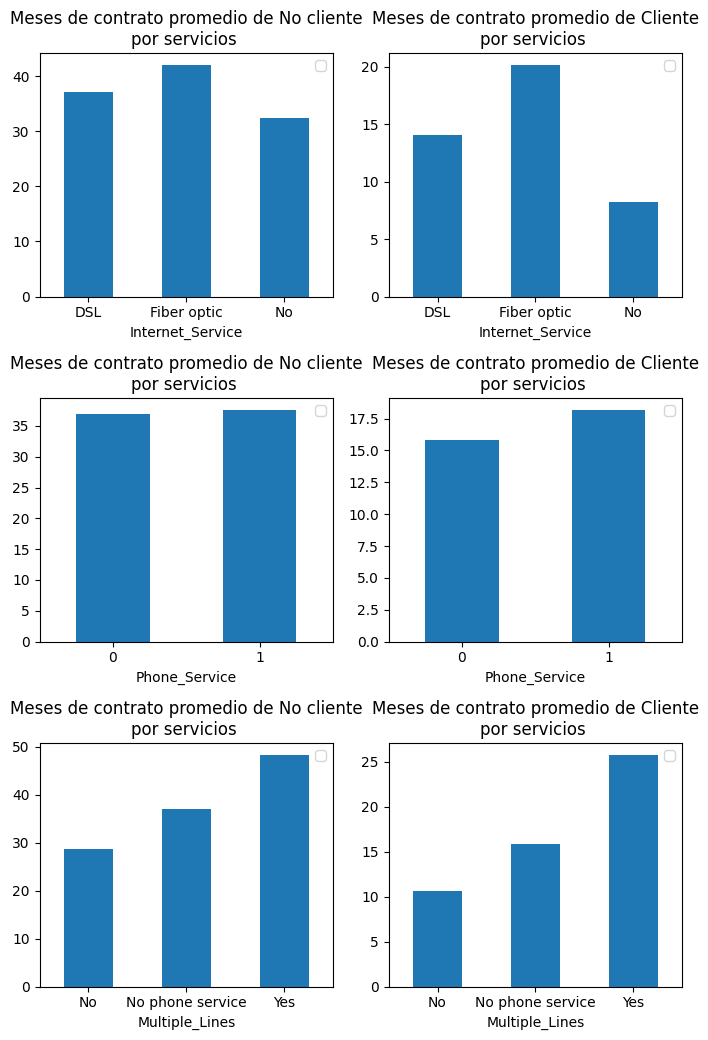

In [ ]:
fig, axs=plt.subplots(nrows=len(categorias_numericas),ncols=2,figsize=(7,len(categorias_numericas)*3.5))
for cliente in datos_cliente['Still_Customer'].unique():
  for i,categoria in enumerate(categorias_numericas):
    tabla = pd.pivot_table(data=datos_cliente[datos_cliente['Still_Customer']==cliente],index=categoria,values='Contract_Months',aggfunc='mean')
    tabla.plot(kind='bar',title=f'Meses de contrato promedio de {'No cliente' if cliente==0 else 'Cliente'}\npor servicios ',\
               ax=axs[i,cliente],rot=0)

for ax in axs.flat:
  ax.legend('')

plt.tight_layout()
plt.show()

### Correlación entre variables numéricas

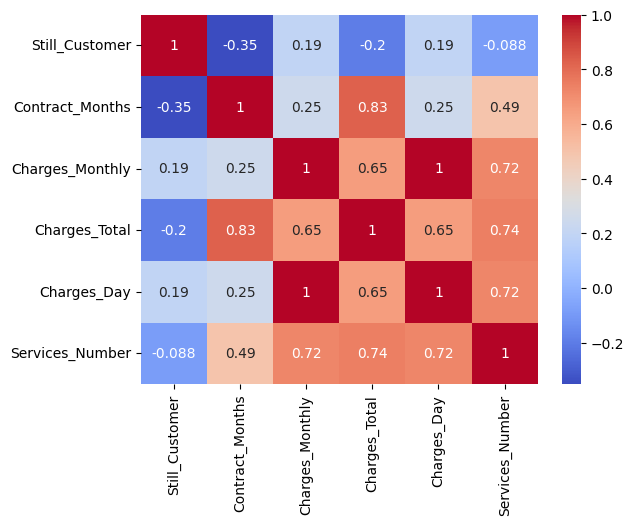

In [ ]:
# Correlacion
cor =datos_cliente[['Still_Customer','Contract_Months','Charges_Monthly','Charges_Total','Charges_Day','Services_Number']].corr()
sns.heatmap(cor,annot=True,cmap='coolwarm');

## Informe Final

### Introducción

El objetivo de este análisis es brindar al equipo de ciencia de datos de Telecom X algunas observaciones apartir del análisis de datos de sus clientes para determinar lo que puede causar que estos dejen a la empresa, es el procesar estos datos, analisay y explorar lo que se brinda en el reporte    

### Limpieza y tratamiento de datos

Se inicio importando los datos desde el API brindado, se uso la bilbioteca *json* y *request* para poder "llamar" los datos, pasarlos a un formato de texto que se interpreta como un diccionario y despues normalizarlos para que pandas pueda interpretar correctamente el dataframe

En el tratamiento se buscaron valores repetidos, valores nulos y valores unicos que puedan dar un indicio de datos faltantes o malos para analizar. Al encontrar estos valores vacios, se eliminan los registros de los que aun son clientes "Churn" pues son bastantes para determinar uno por uno, en la columna de gastos totales, se pueden rellenar estos valores con 0 pues viendoslos, son pocos los que estan de esta manera y se observa que ninguno de ellos es cliente y no tiene servicios para pagar.

Eliminando estos valores se cambian los tipos de datos de cada columna al deseado que puede ser tipo float para poder procesarlos mejor.

#### Agregación de columnas

Se agregan las columnas de gastos al día que surge directamente de la columna de gastos mensuales para que al visualizar el análisis sea mas interpretativo, ademas de otra columna de la cantidad de servicios contratados, pues estos pueden brindar información de si los clientes con mas o menos servicios tienden a dejar la empresa  

#### Estilizacion de columnas

Se renombraron algunas columnas para que visualmente se vea mejor, algo a remarcar es que los nombres estan en inglés, se dejan asi pero con palabras que describan mejor los datos en ellas para mejor visualización

### Análisis exploratorio de datos

Como inicio se determina algunos valores estadisticos como la media, mediana, desviación estandar, máximo o mínimo de las columnas numericas, esto logra dar indicios rapidos como la distribución de los que son clientes y los que ya no, sin embargo, se hacen pequeñas visualizaciones para presentarlas mejor
![distribucion de clientes](https://raw.githubusercontent.com/marmalux/Clientes_TelecomX/refs/heads/main/images/distribucion_clientes.png)


#### Categorías personales
La distribución muestra una alta disminución de clientes, para ver mas a detalle lo que sucede se puede iniciar viendo la relación que puede tener lo relacionado con cosas "personales" como si son mayores a 65 o si tienen pareja o dependientes, se divide en genero pues la pareja toma mas importancia de que parte es.
![Servicio de internet](https://raw.githubusercontent.com/marmalux/Clientes_TelecomX/refs/heads/main/images/categorias_personas.png)

#### Categorías varias

Otras categorías a tomar en cuenta son aquellas que tienen que ver mas con el servicio, como si usan solo servicio telefónico, que tipo de internet usan y si tienen multiples lineas o servicios contratados

![categorias_otras](https://raw.githubusercontent.com/marmalux/Clientes_TelecomX/refs/heads/main/images/comparacion_demas_categorias.png)

#### Pago y tiempo de uso
De igual manera se hace una comparación del pago que los usuarios dan que involucren cosas como el tipo de servicio de internet, si este pago afectaba la cancelación o si no les gustaba el precio que pagaban por día o mes su servicio. Asimismo, el tiempo de contrato puede brindar información de como eran aquellos que dejaron la empresa y los que continuan, es decir el tiempo que probaron o usaron estos servicios

![pago clientes](https://raw.githubusercontent.com/marmalux/Clientes_TelecomX/refs/heads/main/images/incidencias_pago_cliente.png)

En cuanto al tiempo de usuarios.
![meses_contrato](https://raw.githubusercontent.com/marmalux/Clientes_TelecomX/refs/heads/main/images/meses_contrato_promedio.png)


### Conclusiones

Como primer análisis notoriao, se nota que la mayor parte de las personas que tienen pareja dejaron la empresa, independientemenete de si eran hombres o mujeres, tambien que no tiene mucho que ver el que los usuarios que se fueron eran mayores a 65 pues parte de ellos aun lo son.

Debido a las gráficas de tipo de servicio de internet y si tienen servicio telefónico, la mayor parte de usuarios que se fueron, tenian el servicio "DSL", el cual es internet que se brinda a partir de la linea telefonica, siendo que en su mayoría, los clientes que estaban, usaban internet de su linea telefonica, lo cual contrasta con los clientes actuales, los cuales tienen mas el servicio de fibra óptica pero sin el servicio telefónico, además, en ambos, preferirian el contrato de mes a mes pero en los clientes que se fueron es donde se concentra las mayores suscripciones de largo plazo (al año o a 2 años).


En general el pago de los que ya no son clientes es menor, alrededor de 20 al mes (alrededor de 0.67 al día), y que los clientes actuales tienen en su mayoría tarifas mas altas, entre 65 a 100 al mes.


En cuanto al pago que se hacía al tipo de internet, se hacia un pago mayor
El pago promedio de la fibra optica por dia para no clientes es de mas de 3, para DSL es 2, y los que no tienen servicio alrededor de 0.7, en cambio, los que aun siguen, tienen un pago promedio menor al dia para fibra optica y DSL


Esto contrasta con que los que se fueron pagaban en promedio mas si no tenían servicio telefonico que los que aun son clientes, los que si tienen servicio telefonico generalmente pagan mas pues en su mayoria tienen multiples lineas telefonicas

El tiempo de contrato también indica que los que se fueron son los usuarios mas antiguos, por lo que algo no les pareció bien del servicio brindado.


### Insights

  **Personal**

Hay relación entre las personas que tienen a alguien mas en casa como la pareja (esta mas) y los dependientes los que se fueron de la compañia, la edad no esta muy relacionada pues son comparables con los que quedaron.
Los servicios mas solicitados de los que no son clientes fueron DSL y fibra optica, pero en su mayoría usaban el servicio de teléfono, en cambio los clientes que aun quedan usan mas fibra optica y no hacen mucho uso de la linea telefónica.

  **Pago**

Según los gráficos de pago, los clientes que se fueron pagaban mas por dia si usaban fibra óptica que los que tenian el servicio DSL, gran parte era por que tenían mas líneas telefónicas, en cambio los que aun son clientes, pagan un poco mas por dia en servicio telefonico pero con menos lineas y por ello menos hacen uso de ella, la mayoria tiene el servicio de fibra pagan menos por dia que los que se fueron.

Otra cosa a tomar en cuenta es que en su mayoría los clientes que se fueron pagaban en generam menos o casi el mínimo por dia que los que se quedaron.

Esto puede implicar que se fueron por que pagaban mas por el servicio de fibra optica que los nuevos usuarios y que el pago que hacian en el servicio telefónico (que era lo que la mayoría querían), además, los que no tenian el servicio telefonico pagaban mas que los que actualmente no tienen servicio telefónico, por lo que el pago es importante a tomar en cuenta.


  **Tiempo y tipo de contrato**

Aunque La mayoría prefirieron el contrato por mes, muchos de los que ya no son clientes optaron por contratos largos de año o 2 años por lo que puede indicar que muchos esperaron a que terminara su contrato para irse por lo que no fué hasta que terminara el contrato el que se notara la baja de clientes

### Sugerencias en base a resultados

Se pudo observar que la mayoría que se fueron fue debido al pago ya sea por el servicio o por que el hecho de tener acompañantes afectara, y además que los servicios que querían (que en su mayoría fue telefonía) aumento el costo comparado con los usuarios que quedan, por lo que podría ayudar es las promociones a estos viejos clientes dandoles mejor precio por su servicio telefónico o incluso darle un servicio extra como lo podria ser la televisión para hacer mas llamativo debido a que solo estaban por el servicio telefónico. Esto podria ayudar a mantener a viejos clientes por las ofertas debido al tiempo en el cual han estado en la empresa.